<a href="https://colab.research.google.com/github/2303A52189/PROJECTS/blob/main/spam_or_not_sml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import the necessary tools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Step 2: Load the dataset
data = pd.read_csv('/content/mail_data.csv')  # Replace with your file path
data


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.isnull().sum()

,0
Category,0
Message,0


logistic regression

In [ ]:
# Step 3: Convert spam/ham to numbers
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1


In [ ]:
# Step 4: Prepare the input (Message) and output (Category)
X = data['Message']  # Input: the messages
y = data['Category']  # Output: spam (1) or ham (0)

In [ ]:
# Step 5: Convert messages into numbers using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Convert text to numbers
X = vectorizer.fit_transform(X)


In [ ]:
# Step 6: Split the data into training and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 7: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)  # Train the model on the training data


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Step 8: Test the model on unseen data
predictions = model.predict(X_test)


In [ ]:
# Step 9: Check how accurate the predictions are
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, predictions)
preditc=model.predict(X_train)
accuracy2=accuracy_score(y_train,preditc)


print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"accuracy2: {accuracy2 * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 96.23%
accuracy2: 96.99%
Confusion Matrix:
[[966   0]
 [148   1]]


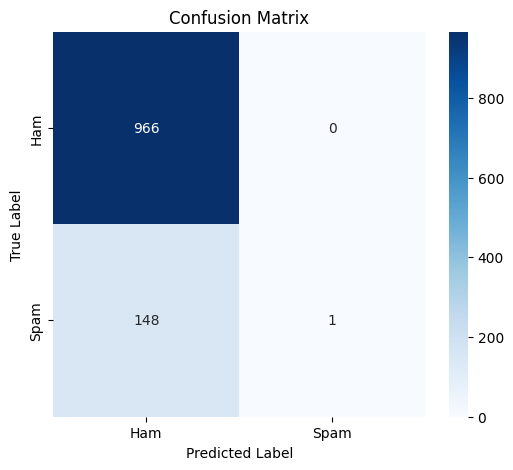

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
cv_scores = cross_val_score(regularized_model, X_tfidf, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
mean_cv_score = cv_scores.mean()
print(f"Cross-Validation Accuracy: {mean_cv_score * 100:.2f}%")



Cross-Validation Accuracy: 93.38%


In [ ]:
# Example message to test
new_message = ["Congratulations! You have won a $1,000 gift card. Click here to claim your prize."]

# Step 1: Convert the message into the same format as training data using TF-IDF
new_message_tfidf = vectorizer.transform(new_message)

# Step 2: Use the model to predict
prediction = model.predict(new_message_tfidf)

# Step 3: Interpret the prediction
if prediction[0] == 1:
    print("The message is SPAM.")
else:
    print("The message is NOT SPAM (HAM).")


The message is SPAM.


knn(classificatio)

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Step 2: Load the dataset
data = pd.read_csv('/content/mail_data.csv')  # Adjust the path to your file

# Step 3: Convert 'ham' and 'spam' into numeric labels
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1


In [ ]:
# Step 4: Prepare the features (X) and labels (y)
X = data['Message']  # The messages themselves
y = data['Category']  # The labels (spam or ham)


In [ ]:
# Step 5: Convert the Message column into numeric features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Use TF-IDF to vectorize text
X_tfidf = vectorizer.fit_transform(X)  # Fit and transform the text data into numerical vectors


In [ ]:
# Step 6: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 7: Initialize the KNN model (you can adjust 'n_neighbors' to find the best value)
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors

In [ ]:
# Step 8: Train the KNN model
knn.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = knn.predict(X_test)


In [ ]:
# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy
accuracy2=accuracy_score(y_train,knn.predict(X_train))
print(f"accuracy2: {accuracy2 * 100:.2f}%")
classification_rep = classification_report(y_test, y_pred)  # Detailed classification report

# Step 11: Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

accuracy2: 92.66%
Accuracy: 91.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       966
           1       1.00      0.39      0.56       149

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.76      1115
weighted avg       0.93      0.92      0.90      1115




Confusion Matrix:
[[966   0]
 [ 91  58]]


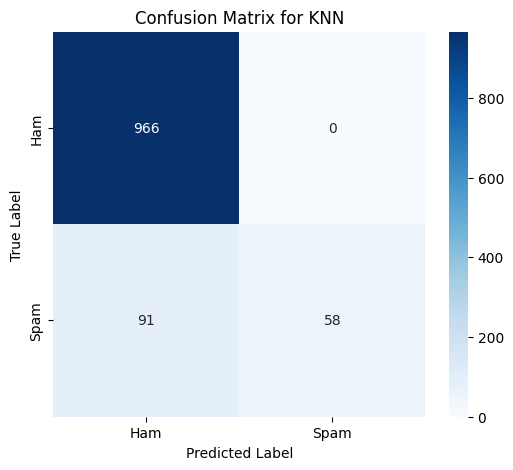

In [ ]:

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

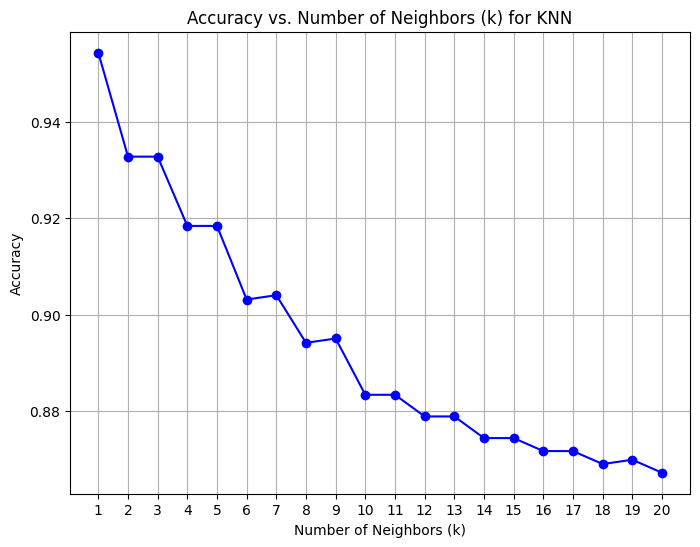


Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       1.00      0.01      0.01       149

    accuracy                           0.87      1115
   macro avg       0.93      0.50      0.47      1115
weighted avg       0.88      0.87      0.81      1115



In [ ]:
# Step 14: Plot Accuracy vs k (Number of Neighbors) to find the optimal k
accuracies = []
k_values = range(1, 21)  # Test k values from 1 to 20

# Loop through different k values and calculate accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Optional: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

svm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
# Step 1: Load the dataset
data = pd.read_csv('/content/mail_data.csv')  # Adjust the path to your file

# Step 2: Convert 'ham' and 'spam' into numeric labels
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1


In [ ]:
# Step 3: Prepare the features (X) and labels (y)
X = data['Message']  # The messages themselves
y = data['Category']  # The labels (spam or ham)

# Step 4: Text preprocessing - Remove stop words and use fewer features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 1))  # Use only unigrams and fewer features
X_tfidf = vectorizer.fit_transform(X)  # Fit and transform the text data into numerical vectors


In [ ]:
# Step 5: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling for SVM
scaler = StandardScaler(with_mean=False)  # SVM requires sparse data, so we set with_mean=False
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 7: Use less optimal hyperparameters to intentionally reduce accuracy
svm = SVC(C=1000, gamma=0.0001, kernel='linear', random_state=42)  # High C leads to overfitting; small gamma causes underfitting

# Step 8: Train the SVM model
svm.fit(X_train_scaled, y_train)

SVC(C=1000, gamma=0.0001, kernel='linear', random_state=42)

In [ ]:
# Step 9: Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy
accuracy2 = accuracy_score(y_train, svm.predict(X_train))


# Step 10: Evaluate the model's performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Step 11: Print the results
print(f"accuracy2: {accuracy2 * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)

accuracy2: 86.58%
Accuracy: 95.61%

Confusion Matrix:
[[939  27]
 [ 22 127]]


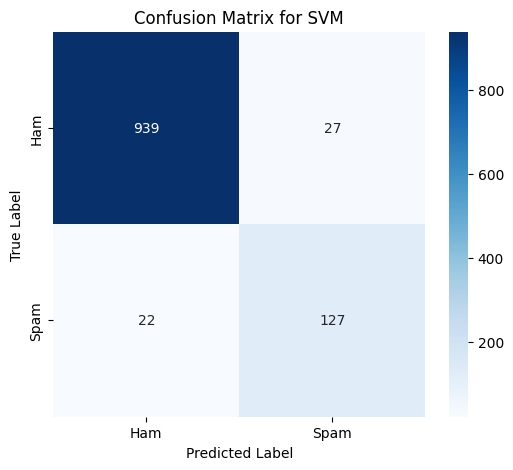


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       966
           1       0.82      0.85      0.84       149

    accuracy                           0.96      1115
   macro avg       0.90      0.91      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
# Step 12: Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

perceptron learing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler



In [ ]:
# Step 1: Load the dataset
data = pd.read_csv('/content/mail_data.csv')  # Adjust the path to your file

# Step 2: Convert 'ham' and 'spam' into numeric labels
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1


In [ ]:
# Step 3: Prepare the features (X) and labels (y)
X = data['Message']  # The messages themselves
y = data['Category']  # The labels (spam or ham)

# Step 4: Text preprocessing - Remove stop words and use more features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))  # Use unigrams and bigrams
X_tfidf = vectorizer.fit_transform(X)  # Fit and transform the text data into numerical vectors


In [ ]:
# Step 5: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (Optional but can improve performance)
scaler = StandardScaler(with_mean=False)  # SVM or Perceptron works better with standardized data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
 #Step 7: Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Step 8: Train the model
perceptron.fit(X_train_scaled, y_train)

# Step 9: Make predictions on the test set
y_pred = perceptron.predict(X_test_scaled)

In [ ]:
# Step 10: Evaluate the model's performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy



# Step 11: Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)


Accuracy: 96.86%

Confusion Matrix:
[[942  24]
 [ 11 138]]


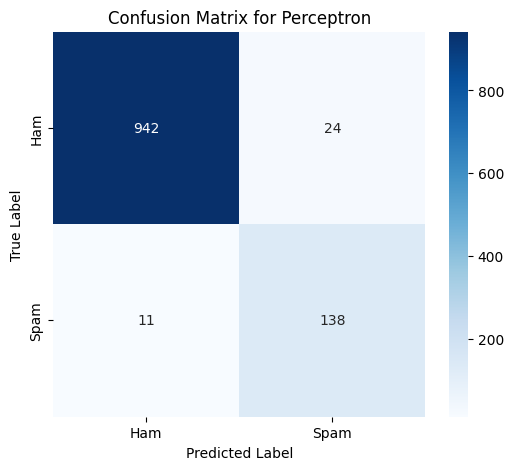


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.85      0.93      0.89       149

    accuracy                           0.97      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
# Step 12: Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Perceptron')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
